In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = np.arange(10)

In [4]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

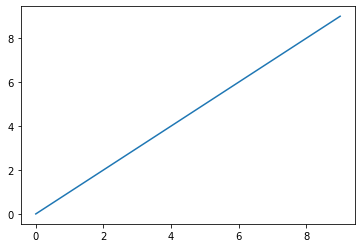

In [5]:
plt.plot(data)

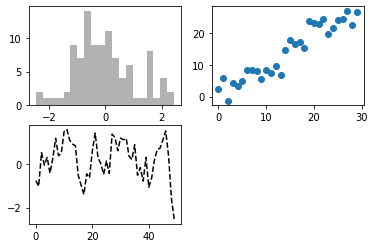

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30))
ax3.plot(np.random.randn(50).cumsum(), 'k--')

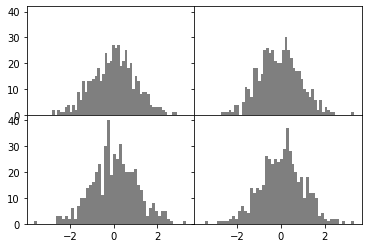

In [7]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins=50, color='k', alpha=.5)
plt.subplots_adjust(wspace=0, hspace=0)

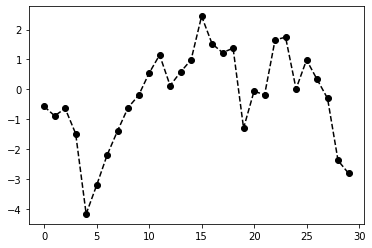

In [8]:
from numpy.random import randn

plt.plot(randn(30).cumsum(), 'ko--')

In [9]:
data = np.random.randn(30).cumsum()

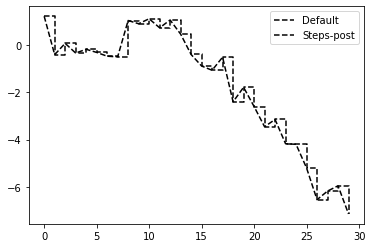

In [10]:
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k--', drawstyle='steps-post', label='Steps-post')
plt.legend(loc='best')

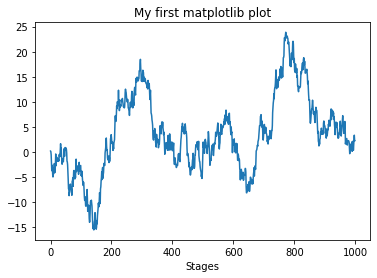

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
ax.plot(np.random.randn(1000).cumsum())

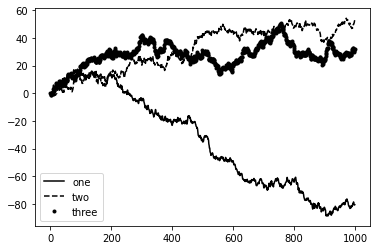

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

In [13]:
from datetime import datetime

Text(0.5, 1.0, 'Import')

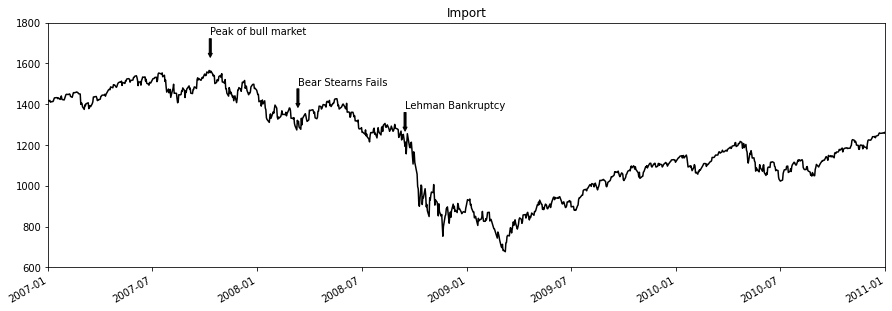

In [28]:
plt.rc('figure', figsize=(15, 5))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext = (date, spx.asof(date) + 225),
               arrowprops=dict(facecolor='black',headwidth=4, width=2, headlength=4),
               horizontalalignment='left', verticalalignment='top')

ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Import')

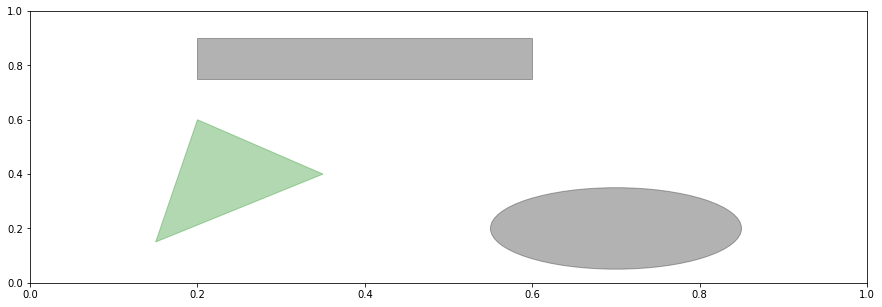

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='k', alpha=.3)
pgon = plt.Polygon([[.15, .15],[.35, .4],[.2, .6]], color='g', alpha=.3)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [36]:
plt.savefig('figpath.svg')

<Figure size 1080x360 with 0 Axes>

In [38]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

<Figure size 1080x360 with 0 Axes>

In [42]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

<Figure size 1080x360 with 0 Axes>

### 9.1.6 matplotlib 설정

In [44]:
plt.rc('figure', figsize=(10, 10))

In [47]:
font_options = {'family' : 'monospace', 'weight': 'bold', 'size': 12}
plt.rc('font', **font_options)

## 9.2 pandas에서 seaborn 으로 그래프 그리기 

### 9.2.1 그래프

<AxesSubplot:>

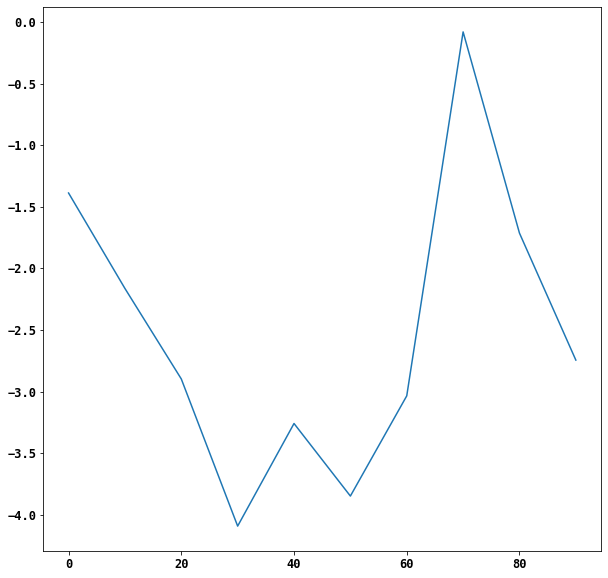

In [50]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<AxesSubplot:>

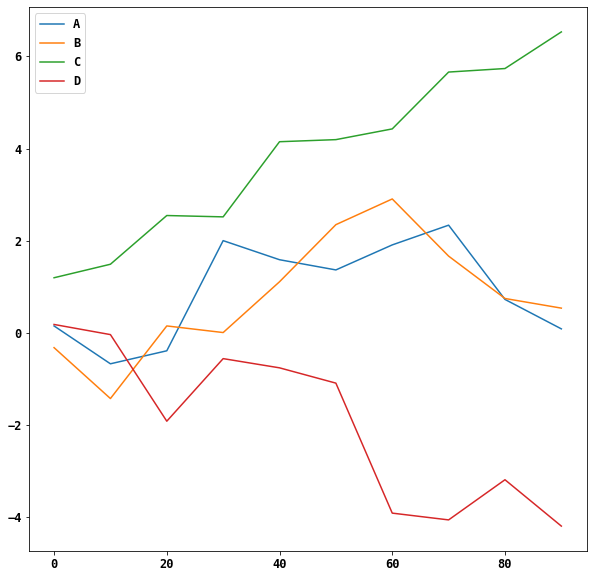

In [55]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0, 100, 10))
df.plot()

### 9.2.2 막대그래프

<AxesSubplot:>

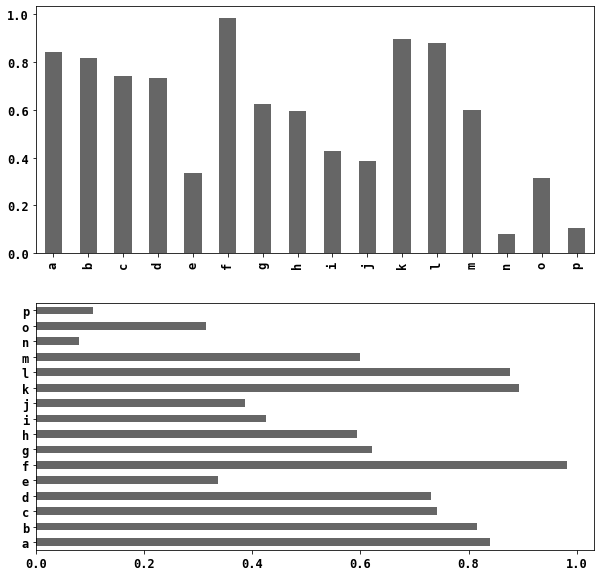

In [62]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.6)
data.plot.barh(ax=axes[1], color='k', alpha=0.6)

In [63]:
df = pd.DataFrame(np.random.rand(6,4), index=['one', 'two', 'three', 'four', 'five', 'siz'], columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [64]:
df

Genus,A,B,C,D
one,0.858776,0.987477,0.840454,0.334017
two,0.932720,0.216947,0.523288,0.173365
three,0.913280,0.110392,0.852139,0.147383
four,0.363112,0.152508,0.556920,0.698757
five,0.787385,0.416660,0.777398,0.691692
siz,0.948108,0.072902,0.893338,0.391464


<AxesSubplot:>

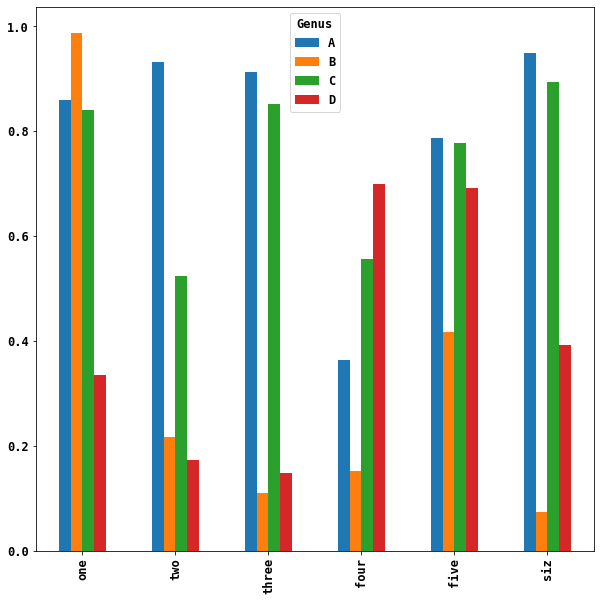

In [65]:
df.plot.bar()

<AxesSubplot:>

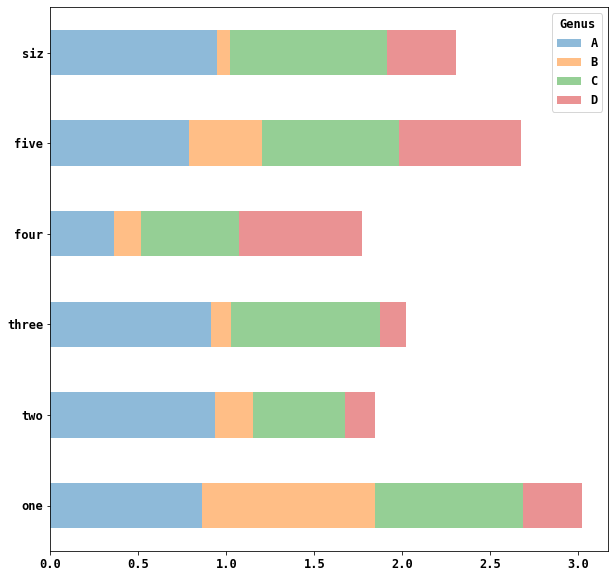

In [67]:
df.plot.barh(stacked=True, alpha=.5)

In [68]:
tips = pd.read_csv('examples/tips.csv')

In [69]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [70]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [71]:
party_counts = party_counts.loc[:, 2:5]

In [72]:
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [73]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)

In [74]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<AxesSubplot:xlabel='day'>

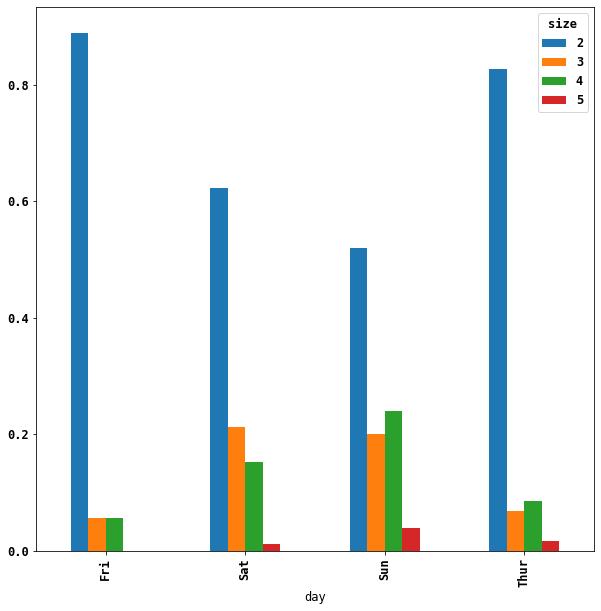

In [75]:
party_pcts.plot.bar()

In [77]:
import seaborn as sns

In [78]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [79]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

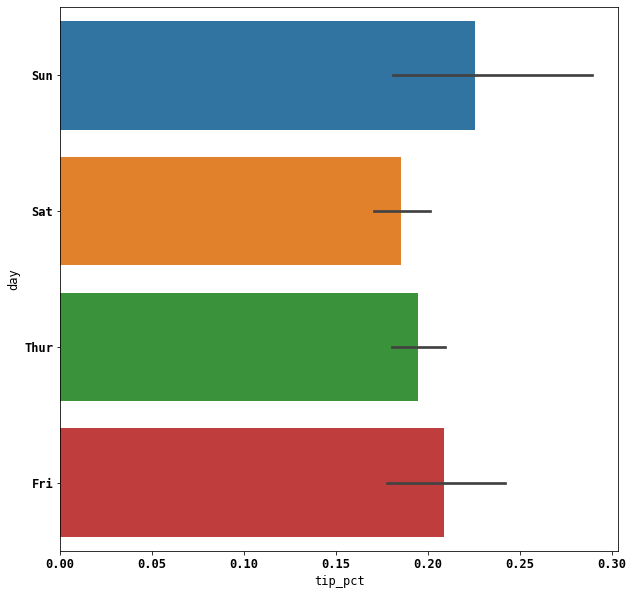

In [80]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

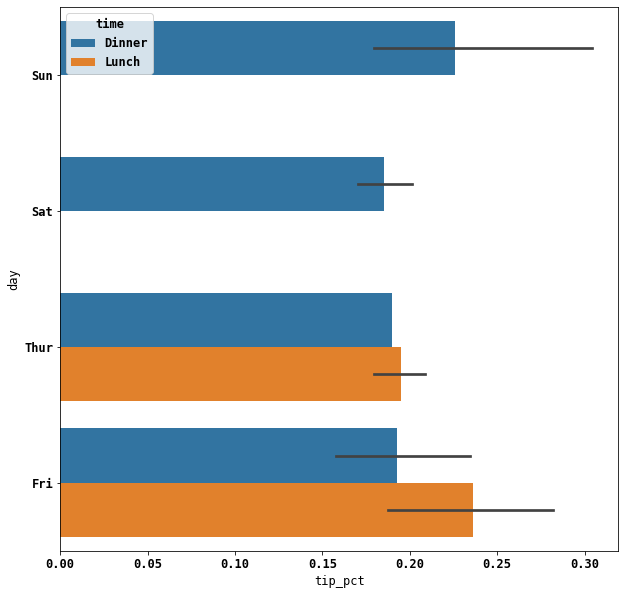

In [81]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [82]:
sns.set(style='whitegrid')

### 9.2.3 히스토그램과 밀도 그래프

<AxesSubplot:ylabel='Frequency'>

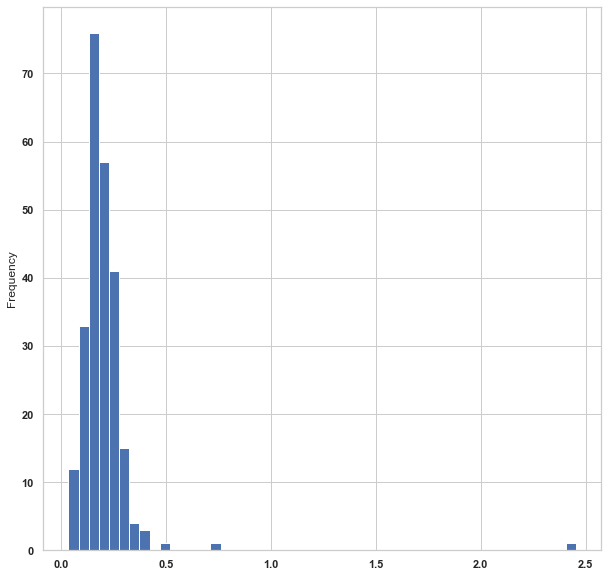

In [83]:
tips['tip_pct'].plot.hist(bins=50)

<AxesSubplot:ylabel='Density'>

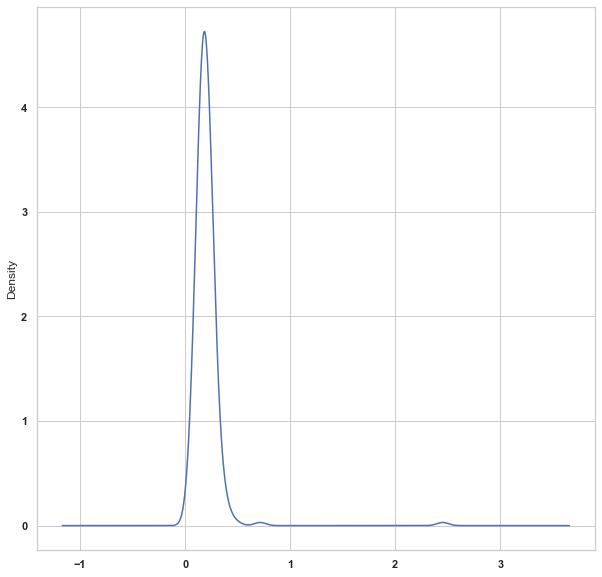

In [84]:
tips['tip_pct'].plot.density()

/opt/anaconda3/envs/enjoy-data-science/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

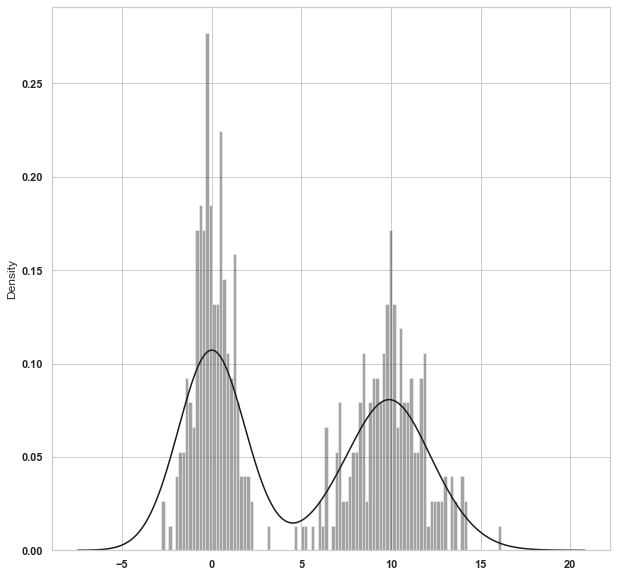

In [87]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### 9.2.4 산포도

In [88]:
macro = pd.read_csv('examples/macrodata.csv')

In [89]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [90]:
trans_data = np.log(data).diff().dropna()

In [91]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


/opt/anaconda3/envs/enjoy-data-science/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Change')

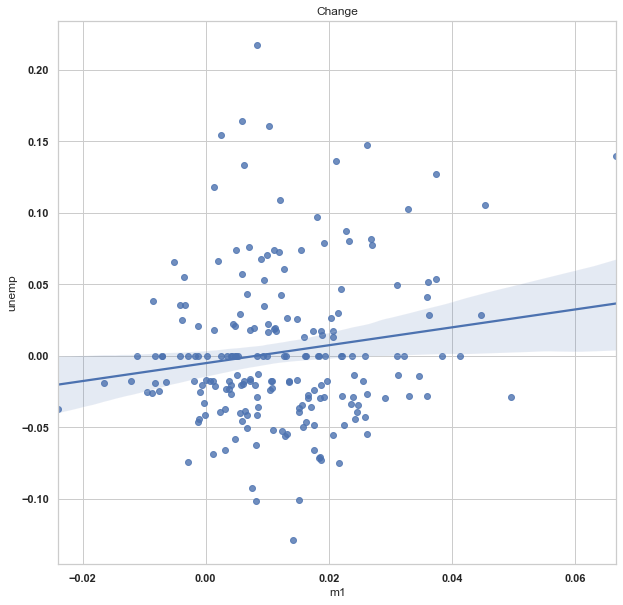

In [92]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Change')

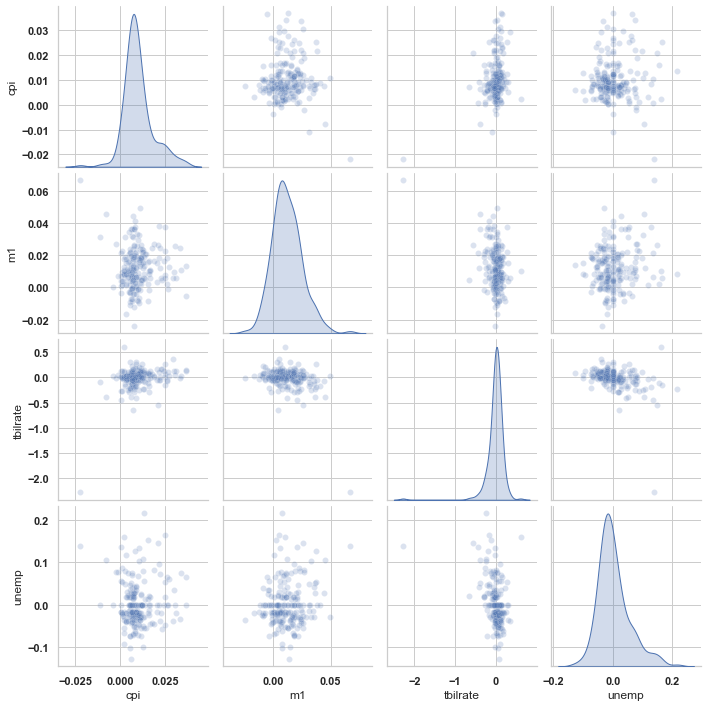

In [93]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### 9.2.5 패싯 그리드와 범주형 데이터

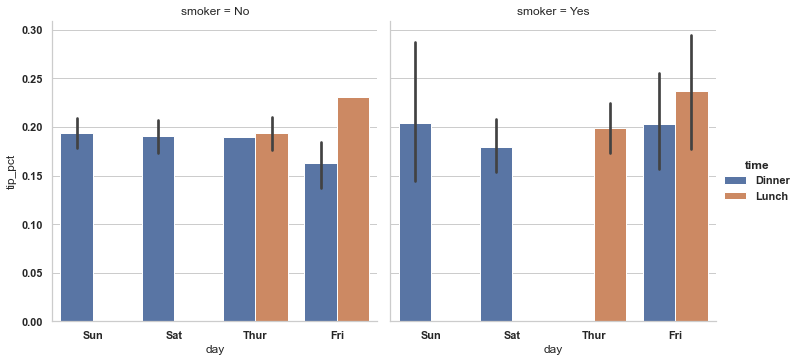

In [103]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

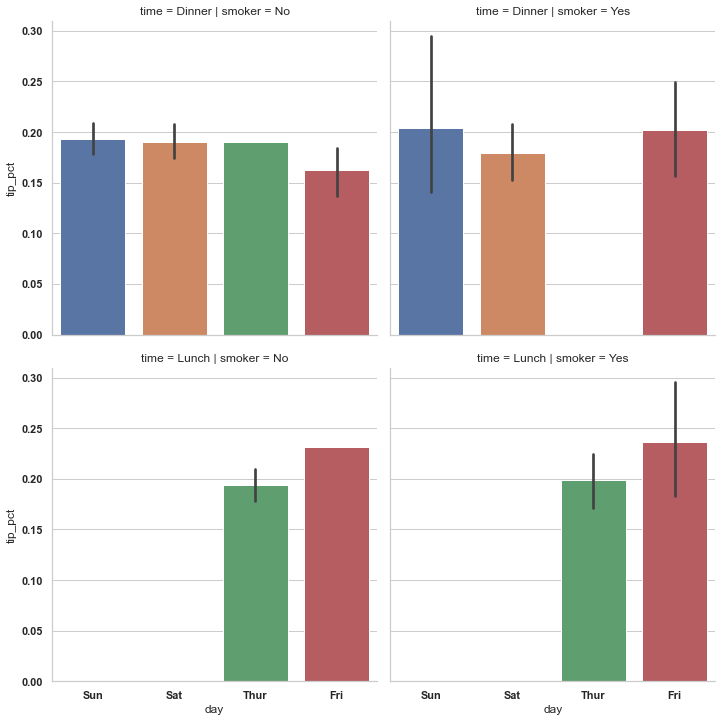

In [102]:
sns.catplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

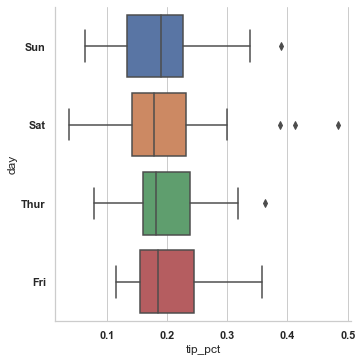

In [101]:
sns.catplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < .5])